# 1. Import and path setting
Installing Kagglehub and downloading dataset via Kaggle API

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/yannik/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


Defining the paths to training, validation, and testing folder. Counting the number of folders and files.

In [2]:
import os

# Define the dataset path
root_folder = "/Users/yannik/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

data_dir = os.path.join(root_folder, 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/')

test_path = os.path.join(root_folder, 'test/test')
train_path = os.path.join(data_dir, 'train')
valid_path = os.path.join(data_dir, 'valid')

# Count the number of folders in a directory
def count_folders(path):
    if os.path.exists(path):
        return len([d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Count the number of files in a directory
def count_files(path):
    if os.path.exists(path):
        return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Function to count files in each folder of a given directory
def count_files_in_folders(path):
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        return {}

    folder_file_counts = {}
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
            folder_file_counts[folder] = file_count

    return folder_file_counts

# Print counts
print(f"Number of folders in train_path: {count_folders(train_path)}")
print(f"Number of folders in valid_path: {count_folders(valid_path)}")
print(f"Number of files in test_path: {count_files(test_path)}")
print('-------------------------------------------------------------------')
# Count files in each folder
train_folder_counts = count_files_in_folders(train_path)
valid_folder_counts = count_files_in_folders(valid_path)
# Display results
print("Files in each folder (train_path):")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nFiles in each folder (valid_path):")
for folder, count in valid_folder_counts.items():
    print(f"{folder}: {count} files")

Number of folders in train_path: 38
Number of folders in valid_path: 38
Number of files in test_path: 33
-------------------------------------------------------------------
Files in each folder (train_path):
Strawberry___healthy: 1824 files
Grape___Black_rot: 1888 files
Potato___Early_blight: 1939 files
Blueberry___healthy: 1816 files
Corn_(maize)___healthy: 1859 files
Tomato___Target_Spot: 1827 files
Peach___healthy: 1728 files
Potato___Late_blight: 1939 files
Tomato___Late_blight: 1851 files
Tomato___Tomato_mosaic_virus: 1790 files
Pepper,_bell___healthy: 1988 files
Orange___Haunglongbing_(Citrus_greening): 2010 files
Tomato___Leaf_Mold: 1882 files
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722 files
Cherry_(including_sour)___Powdery_mildew: 1683 files
Apple___Cedar_apple_rust: 1760 files
Tomato___Bacterial_spot: 1702 files
Grape___healthy: 1692 files
Tomato___Early_blight: 1920 files
Corn_(maize)___Common_rust_: 1907 files
Grape___Esca_(Black_Measles): 1920 files
Raspberry___healt

Importing all libraries

In [47]:
from tensorflow.keras.backend import clear_session

clear_session()

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import scipy

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16

# 2 First training session

In [6]:
# Define the image generators for the training and validation set

batch_size = 32
num_classes = 38
img_size = (256, 256)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

# Import the VGG16 model as a base line
base_model = VGG16(weights="imagenet", include_top=False)

# base_model.trainable = False  #  freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification part 
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(num_classes, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


2024-12-13 21:22:24.157367: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-13 21:22:24.157396: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-13 21:22:24.157404: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-13 21:22:24.158022: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 21:22:24.158290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d6bbae143d832006294945121d1f1fc so we will re-download the data.
58889256/58889256 [==============================] - 45s 1us/step


In [7]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# Save model every 10 epochs
checkpoint_periodic = ModelCheckpoint(
    'model_VGG16_epoch_{epoch:02d}.h5',
    save_freq='epoch',
    period=10,
    save_best_only=False,
    verbose=1
)

# Save model with best accuracy
checkpoint_best = ModelCheckpoint(
    'model_VGG16_best_accuracy.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Combine all callbacks
callbacks = [early_stopping, reduce_lr, checkpoint_periodic, checkpoint_best]

In [8]:
# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    history_0 = model.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=callbacks)

Epoch 1/10


2024-12-13 21:23:49.607091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 1.3819 - accuracy: 0.5950

2024-12-13 21:44:02.254942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.76577, saving model to model_VGG16_best_accuracy.h5
2196/2196 [==============================] - 1530s 696ms/step - loss: 1.3819 - accuracy: 0.5950 - val_loss: 0.8093 - val_accuracy: 0.7658 - lr: 0.0010


/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
2196/2196 [==============================] - ETA: 0s - loss: 1.0782 - accuracy: 0.7305
Epoch 2: val_accuracy improved from 0.76577 to 0.79554, saving model to model_VGG16_best_accuracy.h5
2196/2196 [==============================] - 1801s 820ms/step - loss: 1.0782 - accuracy: 0.7305 - val_loss: 0.8034 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 3/10
2196/2196 [==============================] - ETA: 0s - loss: 1.2203 - accuracy: 0.7488
Epoch 3: val_accuracy improved from 0.79554 to 0.82275, saving model to model_VGG16_best_accuracy.h5
2196/2196 [==============================] - 1831s 834ms/step - loss: 1.2203 - accuracy: 0.7488 - val_loss: 0.7989 - val_accuracy: 0.8227 - lr: 0.0010
Epoch 4/10
2196/2196 [==============================] - ETA: 0s - loss: 1.4426 - accuracy: 0.7532
Epoch 4: val_accuracy did not improve from 0.82275
2196/2196 [==============================] - 1824s 831ms/step - loss: 1.4426 - accuracy: 0.7532 - val_loss: 1.3689 - val_accuracy: 0.7733 - lr: 0.0010


In [10]:
# Unfreeze the last 4 layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    history_1 = model.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=5,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=callbacks)

Epoch 1/5


2024-12-14 04:54:52.728929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 0.8356 - accuracy: 0.8614

2024-12-14 05:13:20.108657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy did not improve from 0.87944
2196/2196 [==============================] - 1397s 635ms/step - loss: 0.8356 - accuracy: 0.8614 - val_loss: 0.7026 - val_accuracy: 0.8772 - lr: 1.0000e-04
Epoch 2/5
2196/2196 [==============================] - ETA: 0s - loss: 0.7863 - accuracy: 0.8626
Epoch 2: val_accuracy improved from 0.87944 to 0.88775, saving model to model_VGG16_best_accuracy.h5


/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2196/2196 [==============================] - 1654s 753ms/step - loss: 0.7863 - accuracy: 0.8626 - val_loss: 0.6121 - val_accuracy: 0.8878 - lr: 1.0000e-04
Epoch 3/5
2196/2196 [==============================] - ETA: 0s - loss: 0.7704 - accuracy: 0.8632
Epoch 3: val_accuracy improved from 0.88775 to 0.88821, saving model to model_VGG16_best_accuracy.h5
2196/2196 [==============================] - 1702s 775ms/step - loss: 0.7704 - accuracy: 0.8632 - val_loss: 0.5596 - val_accuracy: 0.8882 - lr: 1.0000e-04
Epoch 4/5
2196/2196 [==============================] - ETA: 0s - loss: 0.7591 - accuracy: 0.8622
Epoch 4: val_accuracy did not improve from 0.88821
2196/2196 [==============================] - 1706s 777ms/step - loss: 0.7591 - accuracy: 0.8622 - val_loss: 0.6857 - val_accuracy: 0.8708 - lr: 1.0000e-04
Epoch 5/5
2196/2196 [==============================] - ETA: 0s - loss: 0.7503 - accuracy: 0.8603
Epoch 5: val_accuracy did not improve from 0.88821
2196/2196 [==============================

In [12]:
# Unfreeze the last 10 layers of the base model
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    history_2 = model.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=5,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=callbacks)

Epoch 1/5


2024-12-14 08:37:29.184397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 0.7333 - accuracy: 0.8620

2024-12-14 08:56:06.555159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy did not improve from 0.88821
2196/2196 [==============================] - 1415s 644ms/step - loss: 0.7333 - accuracy: 0.8620 - val_loss: 0.6892 - val_accuracy: 0.8704 - lr: 1.0000e-04
Epoch 2/5
2196/2196 [==============================] - ETA: 0s - loss: 0.7249 - accuracy: 0.8610
Epoch 2: val_accuracy improved from 0.88821 to 0.88895, saving model to model_VGG16_best_accuracy.h5
2196/2196 [==============================] - 1658s 755ms/step - loss: 0.7249 - accuracy: 0.8610 - val_loss: 0.5360 - val_accuracy: 0.8889 - lr: 1.0000e-04


/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/5
2196/2196 [==============================] - ETA: 0s - loss: 0.7250 - accuracy: 0.8597
Epoch 3: val_accuracy did not improve from 0.88895
2196/2196 [==============================] - 1723s 785ms/step - loss: 0.7250 - accuracy: 0.8597 - val_loss: 0.6669 - val_accuracy: 0.8630 - lr: 1.0000e-04
Epoch 4/5
2196/2196 [==============================] - ETA: 0s - loss: 0.7207 - accuracy: 0.8580
Epoch 4: val_accuracy did not improve from 0.88895
2196/2196 [==============================] - 1801s 820ms/step - loss: 0.7207 - accuracy: 0.8580 - val_loss: 0.6142 - val_accuracy: 0.8748 - lr: 1.0000e-04
Epoch 5/5
2196/2196 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.8596
Epoch 5: saving model to model_VGG16_epoch_05.h5

Epoch 5: val_accuracy did not improve from 0.88895
2196/2196 [==============================] - 1898s 865ms/step - loss: 0.6943 - accuracy: 0.8596 - val_loss: 0.5709 - val_accuracy: 0.8808 - lr: 1.0000e-04


In [5]:
# Load the current best model to continue training

model = load_model("model_VGG16_best_accuracy.h5")

model.summary()

2024-12-15 21:18:08.164479: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-15 21:18:08.164502: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-15 21:18:08.164509: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-15 21:18:08.164914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-15 21:18:08.165302: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [16]:
# Unfreeze the last 10 layers of the base model
for layer in base_model.layers:
    layer.trainable = True

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    history_3 = model.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=20,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=callbacks)

Epoch 1/20


2024-12-14 11:28:50.718665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 1.3514 - accuracy: 0.8343

2024-12-14 12:13:43.365598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from 0.88895 to 0.89060, saving model to model_VGG16_best_accuracy.h5


/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2196/2196 [==============================] - 3013s 1s/step - loss: 1.3514 - accuracy: 0.8343 - val_loss: 0.8812 - val_accuracy: 0.8906 - lr: 1.0000e-05
Epoch 2/20
2196/2196 [==============================] - ETA: 0s - loss: 0.9990 - accuracy: 0.8769
Epoch 2: val_accuracy improved from 0.89060 to 0.90158, saving model to model_VGG16_best_accuracy.h5
2196/2196 [==============================] - 3293s 1s/step - loss: 0.9990 - accuracy: 0.8769 - val_loss: 0.7394 - val_accuracy: 0.9016 - lr: 1.0000e-05
Epoch 3/20
2196/2196 [==============================] - ETA: 0s - loss: 1.0171 - accuracy: 0.8935
Epoch 3: val_accuracy improved from 0.90158 to 0.92025, saving model to model_VGG16_best_accuracy.h5
2196/2196 [==============================] - 3285s 1s/step - loss: 1.0171 - accuracy: 0.8935 - val_loss: 0.7910 - val_accuracy: 0.9203 - lr: 1.0000e-05
Epoch 4/20
2196/2196 [==============================] - ETA: 0s - loss: 0.8852 - accuracy: 0.9120
Epoch 4: val_accuracy improved from 0.92025 to 0

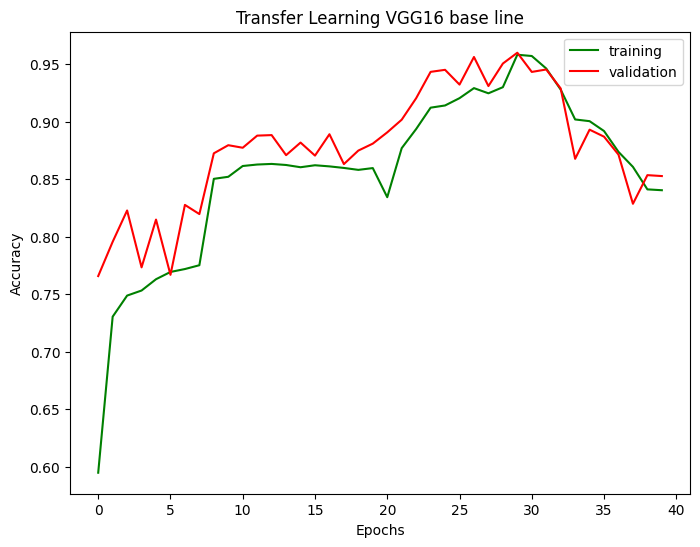

In [22]:
# Having a look at the training and validation accuracy

train_acc_0 = history_0.history['accuracy']
train_acc_1 = history_1.history['accuracy']
train_acc_2 = history_2.history['accuracy']
train_acc_3 = history_3.history['accuracy']
val_acc_0 = history_0.history['val_accuracy']
val_acc_1 = history_1.history['val_accuracy']
val_acc_2 = history_2.history['val_accuracy']
val_acc_3 = history_3.history['val_accuracy']

train_acc_total = train_acc_0 + train_acc_1 + train_acc_2 + train_acc_3
val_acc_total = val_acc_0 + val_acc_1 + val_acc_2 + val_acc_3

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(train_acc_total)), train_acc_total, c="g", label="training")
plt.plot(np.arange(len(val_acc_total)), val_acc_total, c="r", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Transfer Learning VGG16 base line")
plt.legend()
plt.show()

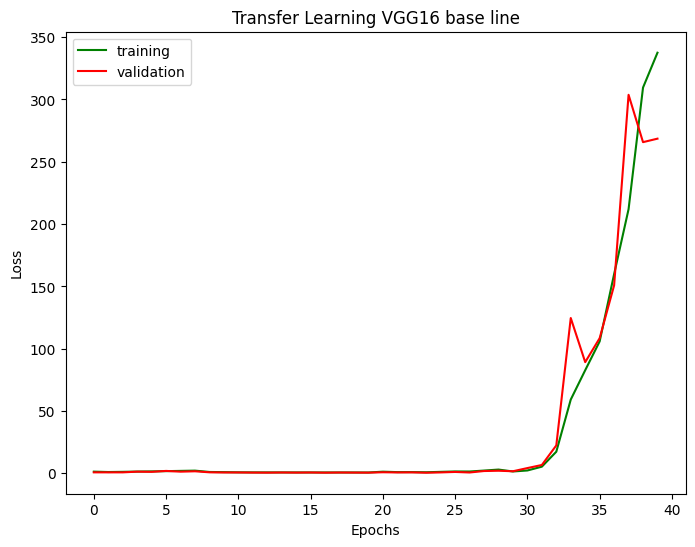

In [ ]:
# Having a look at the training and validation loss

train_loss_0 = history_0.history['loss']
train_loss_1 = history_1.history['loss']
train_loss_2 = history_2.history['loss']
train_loss_3 = history_3.history['loss']
val_loss_0 = history_0.history['val_loss']
val_loss_1 = history_1.history['val_loss']
val_loss_2 = history_2.history['val_loss']
val_loss_3 = history_3.history['val_loss']

train_loss_total = train_loss_0 + train_loss_1 + train_loss_2 + train_loss_3
val_loss_total = val_loss_0 + val_loss_1 + val_loss_2 + val_loss_3

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(train_loss_total)), train_loss_total, c="g", label="training")
plt.plot(np.arange(len(val_loss_total)), val_loss_total, c="r", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Transfer Learning VGG16 base line")
plt.legend()
plt.show()

After the model peaks at a validation accuracy of 0.96 in epoch 30, the model starts to overfit which can be seen in the drastic increase in the loss and the decrease in accuracy. I will now change a couple of things for further fine-tuning:

- Increasing the rate of the second dropout layer to 0.3
- Adding regularization to the second Dense layer of the classification part
- changing the EarlyStopping callback to monitor the val_loss instead of val_accuracy with a smaller patience of 5

# 3 Fine-tuning 

In [58]:
# Clearing the session to prevent continued training on top of an existing model
from tensorflow.keras.backend import clear_session

clear_session()

In [59]:
# Load the current best model
model = load_model("model_VGG16_best_accuracy.h5")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [44]:
# Check if the accuracies of the loaded model match the results from the training above
with tf.device('/device:GPU:0'):
    # Evaluate on the training set
    train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    # Evaluate on the validation set
    val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

2024-12-16 11:26:41.529188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2197/2197 [==============================] - 1364s 621ms/step - loss: 1.3913 - accuracy: 0.9598
Training Accuracy: 0.9598
550/550 [==============================] - 392s 713ms/step - loss: 1.6950 - accuracy: 0.9598
Validation Accuracy: 0.9598


In [60]:
# Define the VGG16 base model again from the loaded model
base_model = model.layers[0]
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [61]:
print(model.get_layer("dropout_1").rate)
print(model.get_layer("dense_1").kernel_regularizer)

0.2
None


In [62]:
# Define the image generators for the training and validation set

batch_size = 32
num_classes = 38
img_size = (256, 256)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [63]:
# Define new callbacks
checkpoint_best = ModelCheckpoint(
    "model_VGG16_fine_tuned_best_accuracy.h5", 
    monitor="val_loss", 
    save_best_only=True, 
    mode="min", 
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss", 
    patience=3, 
    restore_best_weights=True, 
    verbose=1
)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

callbacks = [early_stopping, reduce_lr, checkpoint_best]

In [64]:
# Check if all alyer are trainable
for layer in model.layers:
    print(layer.name, layer.trainable)

vgg16 True
global_average_pooling2d True
dense True
dropout True
dense_1 True
dropout_1 True
dense_2 True


In [65]:
#  Check the learning rate at the moment the model was saved

print("Old learning rate:", model.optimizer.learning_rate.numpy())
# model.optimizer.learning_rate.assign(1e-5)
# print("New learning rate:", model.optimizer.learning_rate.numpy())

Old learning rate: 2e-06


So far, I did not apply any changes to the model. I only modified the EarlyStopping callback to monitor the "val_loss" instead of the val_accuracy" in the training before. I also reduced the pateince variable to 3 in the EarlyStopping and ReduceLROnPlateau callback. For the latter, I also change the "factor" to 0.5 so the rate gets only reduce by half.
The strategy is now as follows:
- First I will have a look at the performance within 3 epochs. Since I did not change anything of model, I expect that the overfitting issues as in the former training will start to emerge (indicated by an increasing val_loss and a decreasing val_accuracy).
- Then I will try to apply the above mentioned changes (dropout rate, regularization) incrementally and check the first 3 epochs. If I see improvements, I will continue the training. Else, I will try the next strategy

In [66]:
# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    history_fine_tuning_0 = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks
    )

Epoch 1/3


2024-12-16 15:00:55.116019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 2.5122 - accuracy: 0.9554

2024-12-16 15:50:00.958747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 2.75731, saving model to model_VGG16_fine_tuned_best_accuracy.h5
2196/2196 [==============================] - 3275s 1s/step - loss: 2.5122 - accuracy: 0.9554 - val_loss: 2.7573 - val_accuracy: 0.9574 - lr: 2.0000e-06
Epoch 2/3
2196/2196 [==============================] - ETA: 0s - loss: 6.7515 - accuracy: 0.9434
Epoch 2: val_loss did not improve from 2.75731
2196/2196 [==============================] - 3301s 2s/step - loss: 6.7515 - accuracy: 0.9434 - val_loss: 10.3867 - val_accuracy: 0.9366 - lr: 2.0000e-06
Epoch 3/3
2196/2196 [==============================] - ETA: 0s - loss: 18.4887 - accuracy: 0.9274
Epoch 3: val_loss did not improve from 2.75731
2196/2196 [==============================] - 3377s 2s/step - loss: 18.4887 - accuracy: 0.9274 - val_loss: 17.0470 - val_accuracy: 0.9388 - lr: 2.0000e-06


As expected, overfitting issues start to decrease the model performance right from the beginning. next, I will increase the rate of the last dopout layer from 0.2 to 0.5.

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

# 4 Testing the model on the test set

In [29]:


# # Define fucntion for loading and preprocessing the test images
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(256, 256), color_mode='rgb')
    img_array = img_to_array(img)
    img_array = img_array.astype('float32') / 255.0
    return img_array

test_images = []
for image_file in os.listdir(test_path):
    image_path = os.path.join(test_path, image_file)
    img_array = load_and_preprocess_image(image_path)
    test_images.append(img_array)

test_images = np.array(test_images)

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
predicted_classes_names = [class_names[idx] for idx in predicted_classes]

for prediction, true_class in zip(predicted_classes_names, os.listdir(test_path)):
    print("Prediction:", prediction, "\t True class:", true_class)

1/2 [==============>...............] - ETA: 0s

2024-12-15 23:14:55.372304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 691ms/step
Prediction: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 	 True class: AppleScab3.JPG
Prediction: Tomato___Early_blight 	 True class: TomatoEarlyBlight2.JPG
Prediction: Tomato___Early_blight 	 True class: TomatoEarlyBlight3.JPG
Prediction: Potato___healthy 	 True class: PotatoHealthy1.JPG
Prediction: Apple___Apple_scab 	 True class: AppleScab2.JPG
Prediction: Tomato___Target_Spot 	 True class: TomatoEarlyBlight1.JPG
Prediction: Potato___healthy 	 True class: PotatoHealthy2.JPG
Prediction: Apple___Apple_scab 	 True class: AppleScab1.JPG
Prediction: Tomato___Early_blight 	 True class: TomatoEarlyBlight4.JPG
Prediction: Tomato___Target_Spot 	 True class: TomatoEarlyBlight5.JPG
Prediction: Tomato___Spider_mites Two-spotted_spider_mite 	 True class: TomatoEarlyBlight6.JPG
Prediction: Potato___Early_blight 	 True class: PotatoEarlyBlight4.JPG
Prediction: Potato___healthy 	 True class: PotatoEarlyBlight5.JPG
Prediction: Potato___Early

In [31]:
test_comparison = pd.DataFrame({
    "Predictions": predicted_classes_names,
    "True_classes": os.listdir(test_path)
})

test_comparison["Correct"] = [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

display(test_comparison)

,Predictions,True_classes,Correct
0,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,AppleScab3.JPG,0
1,Tomato___Early_blight,TomatoEarlyBlight2.JPG,1
2,Tomato___Early_blight,TomatoEarlyBlight3.JPG,1
3,Potato___healthy,PotatoHealthy1.JPG,1
4,Apple___Apple_scab,AppleScab2.JPG,1
5,Tomato___Target_Spot,TomatoEarlyBlight1.JPG,0
6,Potato___healthy,PotatoHealthy2.JPG,1
7,Apple___Apple_scab,AppleScab1.JPG,1
8,Tomato___Early_blight,TomatoEarlyBlight4.JPG,1
9,Tomato___Target_Spot,TomatoEarlyBlight5.JPG,0


In [32]:
test_comparison["Correct"].value_counts(normalize=True)

Correct
1    0.757576
0    0.242424
Name: proportion, dtype: float64